In [1]:
import psftool # Note: all units are in CGS with this module!
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# Data preparation

In [2]:
# Load the data: a pupil (the one from the IRSOL Gregory-Coudé telescope) and a granulation pattern

data        = np.load('data.npz')
pupil_IRSOL = data['pupil']
granulation = data['granulation']

# Coordinates of the pixels of the granulation image (in cm)
x = 1.e8*np.linspace(0,9.6,960)
y = 1.e8*np.linspace(0,9.6,960)

<IPython.core.display.Javascript object>


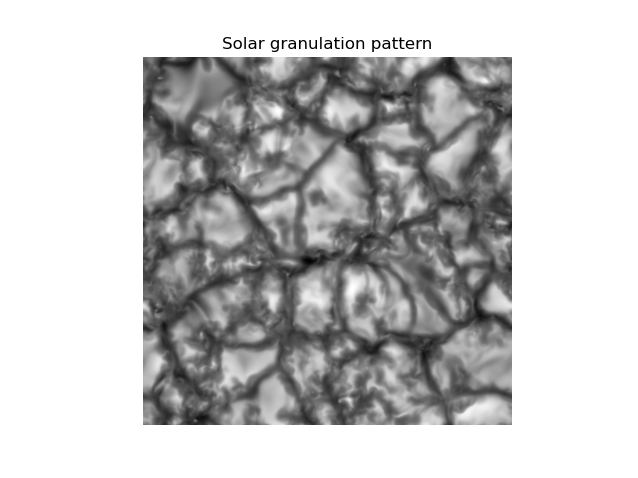

In [3]:
# Display the granulation pattern

fig = plt.figure(1)
ax  = fig.add_subplot()
im  = ax.imshow(granulation, origin='lower', cmap=plt.cm.gray)
ttl = ax.set_title('Solar granulation pattern')
ext = ax.axis('off')

# Model image degradation

We cover three distinct cases:

1. The instrument has no central obscuration; the PSF is then given by the Airy pattern
2. The central obscuration can be approximatedly modelled by a secondary mirror held by a given number of `legs'
3. The PSF is constructed from a given arbitrary pupil

## Case 1: the Airy PSF

	Evaluation of the Bessel function (wl = 5.25e-05)...


<IPython.core.display.Javascript object>


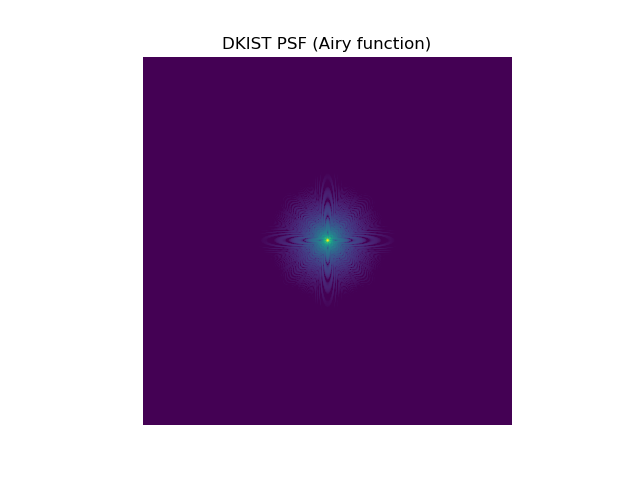

In [4]:
# Build and display the PSF of the Daniel K. Inouye Solar Telescope (DKIST) telescope (no central obscuration)
#
# airyPSF(x_coord, y_coord, aperture, distance_to_target, wavelength)
# Units: CGS

psf_DKIST = psftool.airyPSF(x,y,400.,149.e11,525.e-7)

fig = plt.figure(2)
ax  = fig.add_subplot()
im  = ax.imshow(np.log10(psftool.ifftshift(psf_DKIST)),origin='lower',vmin=-8.,vmax=-2)
ttl = ax.set_title('DKIST PSF (Airy function)')
ext = ax.axis('off')

<IPython.core.display.Javascript object>


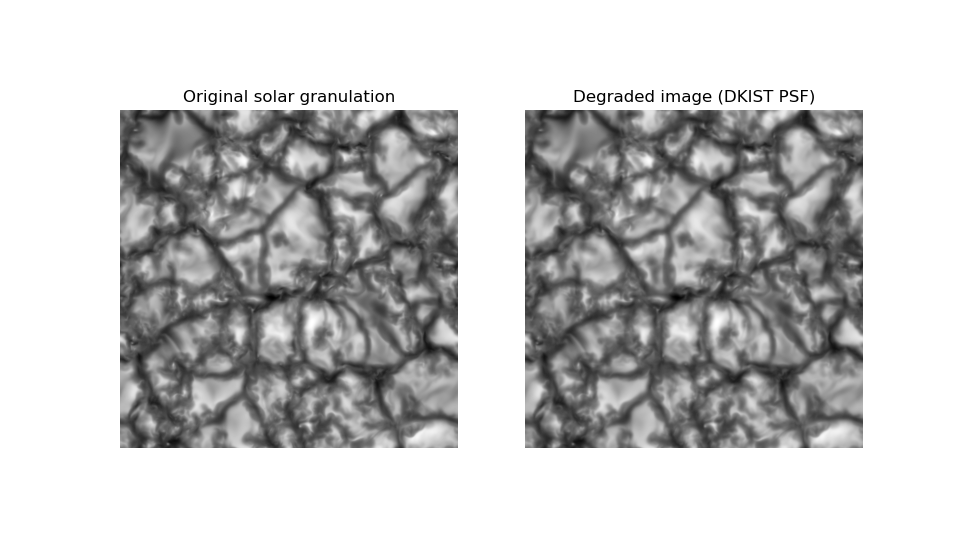

In [5]:
# Convolve with the Airy PSF
#
# degrade(model_image, psf=airy_PSF)

granulation_DKIST = psftool.degrade(granulation, psf=psf_DKIST)

fig  = plt.figure(3)

ax1  = fig.add_subplot(1, 2, 1)
im1  = ax1.imshow(granulation,origin='lower',cmap=plt.cm.gray)
ttl1 = ax1.set_title('Original solar granulation')
ext1 = ax1.axis('off')

ax2  = fig.add_subplot(1, 2, 2)
im2  = ax2.imshow(granulation_DKIST,origin='lower',cmap=plt.cm.gray)
ttl2 = ax2.set_title('Degraded image (DKIST PSF)')
ext2 = ax2.axis('off')

## Case 2: a generic PSF from a pupil with central obscuration

<IPython.core.display.Javascript object>


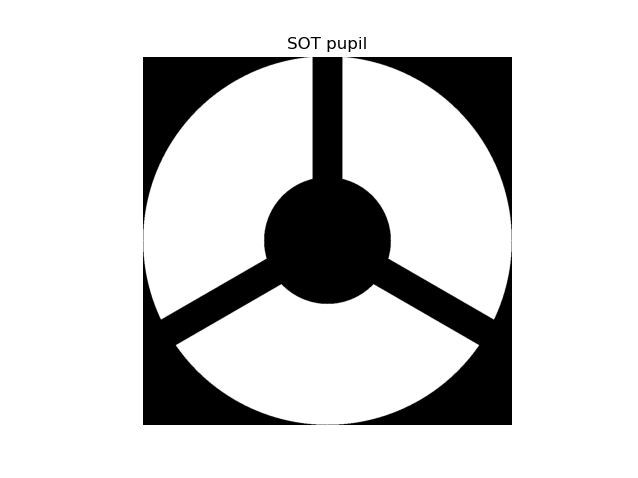

In [6]:
# Build and display the pupil of the Solar Optical Telescope (SOT)
#
# spiderPupil(aperture, central_obscuration_diameter, number_of_legs, legs_width, pupil_radius)
# Units: CGS, pupil_radius in pixels

pupil_SOT = psftool.spiderPupil(50.,17.2,3,4.,500)

fig = plt.figure(4)
ax  = fig.add_subplot()
im  = ax.imshow(pupil_SOT,origin='lower',cmap=plt.cm.gray)
ttl = ax.set_title('SOT pupil')
ext = ax.axis('off')

<IPython.core.display.Javascript object>


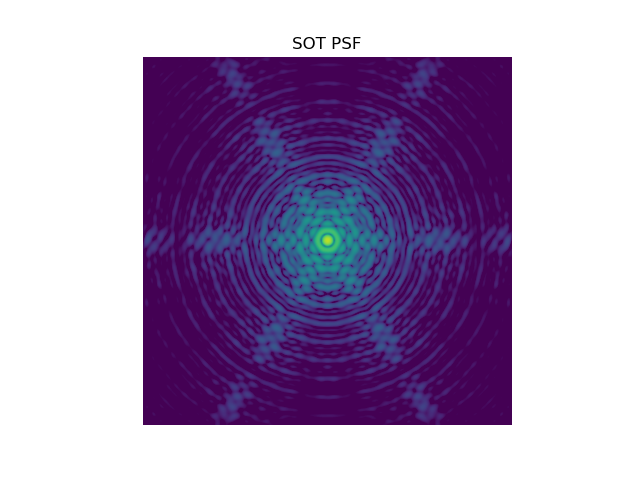

In [7]:
# Build and display the PSF of the Solar Optical Telescope (SOT)
#
# generalPSF(pupil, x_coord, y_coord, aperture, distance_to_target, wavelength)
# Units: CGS

psf_SOT = psftool.generalPSF(pupil_SOT, x,y,50.,149.e11,525.e-7)

fig = plt.figure(5)
ax  = fig.add_subplot()
im  = ax.imshow(np.log10(psftool.ifftshift(psf_SOT)),origin='lower',vmin=-8.,vmax=-2)
ttl = ax.set_title('SOT PSF')
ext = ax.axis('off')

<IPython.core.display.Javascript object>


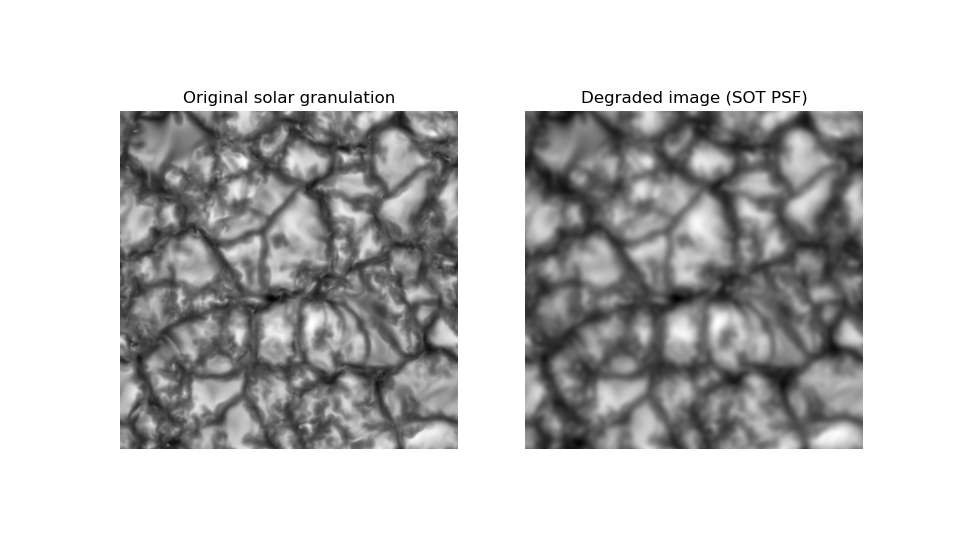

In [8]:
# Convolve with the SOT PSF
#
# degrade(model_image, psf=psf_SOT)

granulation_SOT = psftool.degrade(granulation, psf=psf_SOT)

fig  = plt.figure(6)

ax1  = fig.add_subplot(1, 2, 1)
im1  = ax1.imshow(granulation,origin='lower',cmap=plt.cm.gray)
ttl1 = ax1.set_title('Original solar granulation')
ext1 = ax1.axis('off')

ax2  = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
im2  = ax2.imshow(granulation_SOT,origin='lower',cmap=plt.cm.gray)
ttl2 = ax2.set_title('Degraded image (SOT PSF)')
ext2 = ax2.axis('off')

## Case 3: a custom PSF

<IPython.core.display.Javascript object>


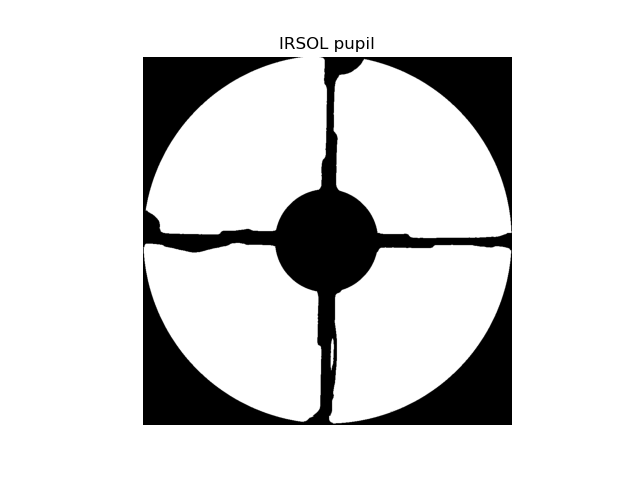

In [9]:
# Display the pupil of the telescope of the Institute for Solar Research of Locarno (IRSOL)
#
# spiderPupil(aperture, central_obscuration_diameter, number_of_legs, legs_width, pupil_radius)
# Units: CGS, pupil_radius in pixels

fig = plt.figure(7)
ax  = fig.add_subplot()
im  = ax.imshow(pupil_IRSOL,origin='lower',cmap=plt.cm.gray)
ttl = ax.set_title('IRSOL pupil')
ext = ax.axis('off')

<IPython.core.display.Javascript object>


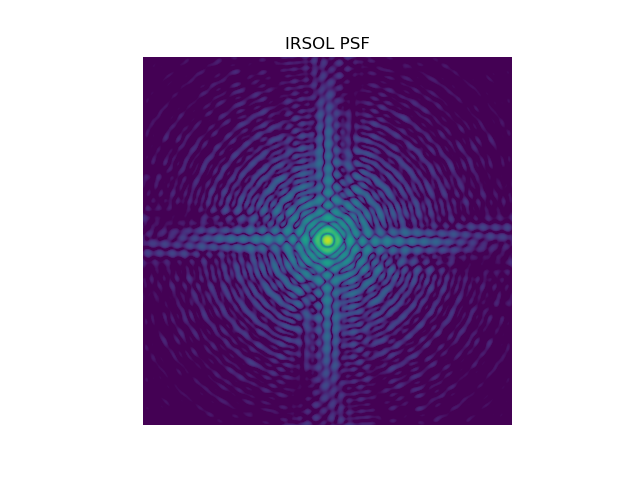

In [10]:
# Build and display the PSF of the telescope of the Institute for Solar Research of Locarno (IRSOL)
#
# generalPSF(pupil, x_coord, y_coord, aperture, distance_to_target, wavelength)
# Units: CGS

psf_IRSOL = psftool.generalPSF(pupil_IRSOL, x,y,50.,149.e11,525.e-7)

fig = plt.figure(8)
ax  = fig.add_subplot()
im  = ax.imshow(np.log10(psftool.ifftshift(psf_IRSOL)),origin='lower',vmin=-8.,vmax=-2)
ttl = ax.set_title('IRSOL PSF')
ext = ax.axis('off')

<IPython.core.display.Javascript object>


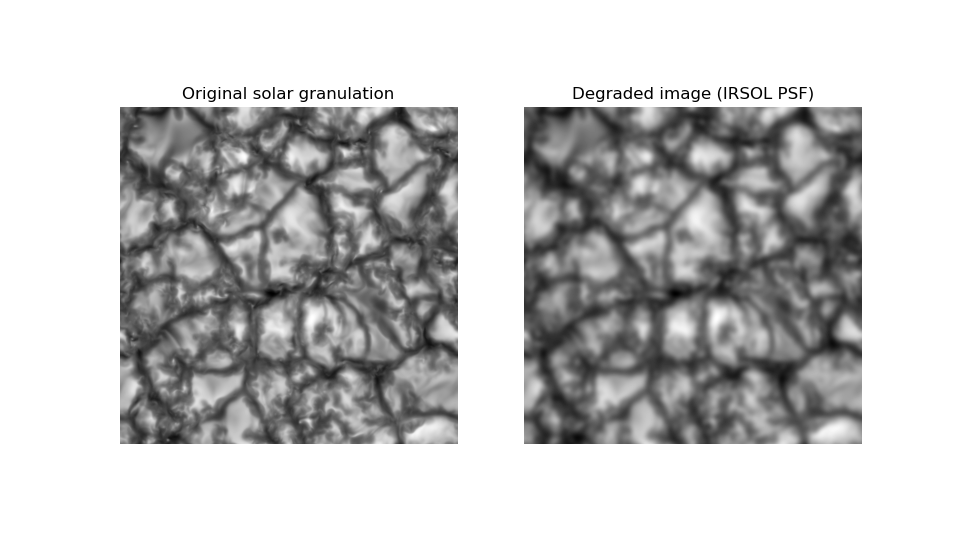

In [11]:
# Convolve with the IRSOL PSF
#
# psftool.degrade(model_image, psf=psf_IRSOL)

granulation_IRSOL = psftool.degrade(granulation, psf=psf_IRSOL)

fig  = plt.figure(9)

ax1  = fig.add_subplot(1, 2, 1)
im1  = ax1.imshow(granulation,origin='lower',cmap=plt.cm.gray)
ttl1 = ax1.set_title('Original solar granulation')
ext1 = ax1.axis('off')

ax2  = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
im2  = ax2.imshow(granulation_IRSOL,origin='lower',cmap=plt.cm.gray)
ttl2 = ax2.set_title('Degraded image (IRSOL PSF)')
ext2 = ax2.axis('off')